In [34]:
import nltk
import json
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import logging
import tempfile
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
validation_set = pd.read_csv("Noticias con descripcion.csv", sep=";")

In [20]:
validation_set.head()

,About Venezuela,Date,Link,Parrafo,Title,Topic
0,True,31 dic. 2018,http://www.eluniverso.com/2018/12/31/video/711...,El éxodo venezolano es considerado por la ONU ...,Éxodo de venezolanos sin precedentes marcó el ...,Economia
1,True,29 dic. 2018,https://www.eluniverso.com/noticias/2018/12/29...,"Ahogado por una crisis económica, Venezuela te...",La crisis se desbordó en Venezuela en 2018,Economia
2,True,29 dic. 2018,https://www.eluniverso.com/noticias/2018/12/29...,El gobierno venezolano ordenó la ocupación de ...,Gobierno de Venezuela se apodera de las instal...,Economia
3,True,27 dic. 2018,http://www.eluniverso.com/2018/12/27/video/711...,"Un sismo de magnitud 5,5 sacudió este jueves a...","Sismo de magnitud 5,5 sacudió Venezuela",Economia
4,True,27 dic. 2018,https://www.eluniverso.com/noticias/2018/12/27...,"Un sismo de magnitud 5,5 sacudió este jueves a...","Venezuela: Sismo de magnitud 5,5 afectó la reg...",Economia


In [31]:
combined2 = validation_set[["Title","Date", "Parrafo", "Link","Topic"]]

In [32]:
combined2.head()

,Title,Date,Parrafo,Link,Topic
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia


In [35]:
#Funcion utilizada para realizar la tokenización
def tokenization(text):
    text = re.split('\W+', text)
    return text

#Creación de nueva columna con el tweet una vez aplicada la función anterior
combined2['texto_tokenized'] = combined2['Parrafo'].apply(lambda x: tokenization(x.lower()))
combined2.head()

,Title,Date,Parrafo,Link,Topic,texto_tokenized
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia,"[el, éxodo, venezolano, es, considerado, por, ..."
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[ahogado, por, una, crisis, económica, venezue..."
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[el, gobierno, venezolano, ordenó, la, ocupaci..."
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,..."
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,..."


In [36]:
# Definimos los stopwords adicionales del idioma a utilizar
stopword = nltk.corpus.stopwords.words('spanish') + ["venezuela", "maduro", "nicolás", "nicolas","guaidó","juan","compartir"]

#Función para remover los stopwords de tweet
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
# Nueva columna con los articulos sin stopwords    
combined2['texto_nonstop'] = combined2['texto_tokenized'].apply(lambda x: remove_stopwords(x))
combined2.head(10)

,Title,Date,Parrafo,Link,Topic,texto_tokenized,texto_nonstop
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia,"[el, éxodo, venezolano, es, considerado, por, ...","[éxodo, venezolano, considerado, onu, mayor, m..."
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[ahogado, por, una, crisis, económica, venezue...","[ahogado, crisis, económica, termina, año, paí..."
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[el, gobierno, venezolano, ordenó, la, ocupaci...","[gobierno, venezolano, ordenó, ocupación, inst..."
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos..."
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos..."
5,Venezuela ante un peor escenario económico,19 dic. 2018,Venezuela está sumida en la peor crisis económ...,https://www.eluniverso.com/noticias/2018/12/19...,Economia,"[venezuela, está, sumida, en, la, peor, crisis...","[sumida, peor, crisis, económica, historia, tr..."
6,Bombarderos rusos dejan Venezuela tras ejercic...,14 dic. 2018,Los dos bombarderos enviados por Moscú el pasa...,https://www.eluniverso.com/noticias/2018/12/14...,Economia,"[los, dos, bombarderos, enviados, por, moscú, ...","[dos, bombarderos, enviados, moscú, pasado, lu..."
7,Esta es la última portada impresa del venezola...,14 dic. 2018,La última edición impresa del diario El Nacion...,https://www.eluniverso.com/noticias/2018/12/14...,Economia,"[la, última, edición, impresa, del, diario, el...","[última, edición, impresa, diario, nacional, c..."
8,Venezuela: Personas con VIH recurren a bebida ...,13 dic. 2018,"Con cuidado, el hombre escoge las hojas verdes...",https://www.eluniverso.com/noticias/2018/12/13...,Economia,"[con, cuidado, el, hombre, escoge, las, hojas,...","[cuidado, hombre, escoge, hojas, verdes, tamañ..."
9,"En Venezuela, el diario El Nacional anuncia el...",13 dic. 2018,"El diario El Nacional, uno de los más antiguos...",https://www.eluniverso.com/noticias/2018/12/13...,Economia,"[el, diario, el, nacional, uno, de, los, más, ...","[diario, nacional, antiguos, fuerte, crítico, ..."


In [37]:
ps = nltk.PorterStemmer()
# Función para aplicas stemming al tweet
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

# Nueva columna luego de aplicar la función creada
combined2['texto_stemmed'] = combined2['texto_nonstop'].apply(lambda x: stemming(x))
combined2.head()

,Title,Date,Parrafo,Link,Topic,texto_tokenized,texto_nonstop,texto_stemmed
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia,"[el, éxodo, venezolano, es, considerado, por, ...","[éxodo, venezolano, considerado, onu, mayor, m...","[éxodo, venezolano, considerado, onu, mayor, m..."
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[ahogado, por, una, crisis, económica, venezue...","[ahogado, crisis, económica, termina, año, paí...","[ahogado, crisi, económica, termina, año, país..."
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[el, gobierno, venezolano, ordenó, la, ocupaci...","[gobierno, venezolano, ordenó, ocupación, inst...","[gobierno, venezolano, ordenó, ocupación, inst..."
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s..."
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s..."


In [39]:
#Funcion utilizada para remover los signos de puntuación
def remove_punct(text):
    for punc in string.punctuation:
        text = text.replace(punc,"")
    text = re.sub('[0-9]+', '', text)
    return text
#Creación de una nueva columna con el tweet sin signos de puntuación
combined2['texto_punct'] = combined2['Parrafo'].apply(lambda x: remove_punct(x))
sid = SentimentIntensityAnalyzer() 
# Creación de una nueva columna con el valor de sentimiento del tweet
combined2["sentiment"] = combined2["Parrafo"].apply(lambda x: sid.polarity_scores(x)["compound"])
combined2.head(10)

,Title,Date,Parrafo,Link,Topic,texto_tokenized,texto_nonstop,texto_stemmed,texto_punct,sentiment
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia,"[el, éxodo, venezolano, es, considerado, por, ...","[éxodo, venezolano, considerado, onu, mayor, m...","[éxodo, venezolano, considerado, onu, mayor, m...",El éxodo venezolano es considerado por la ONU ...,-0.6249
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[ahogado, por, una, crisis, económica, venezue...","[ahogado, crisis, económica, termina, año, paí...","[ahogado, crisi, económica, termina, año, país...",Ahogado por una crisis económica Venezuela ter...,-0.3818
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[el, gobierno, venezolano, ordenó, la, ocupaci...","[gobierno, venezolano, ordenó, ocupación, inst...","[gobierno, venezolano, ordenó, ocupación, inst...",El gobierno venezolano ordenó la ocupación de ...,-0.0258
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s...",Un sismo de magnitud sacudió este jueves al m...,0.0000
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s...",Un sismo de magnitud sacudió este jueves al m...,-0.2500
5,Venezuela ante un peor escenario económico,19 dic. 2018,Venezuela está sumida en la peor crisis económ...,https://www.eluniverso.com/noticias/2018/12/19...,Economia,"[venezuela, está, sumida, en, la, peor, crisis...","[sumida, peor, crisis, económica, historia, tr...","[sumida, peor, crisi, económica, historia, tra...",Venezuela está sumida en la peor crisis económ...,0.2732
6,Bombarderos rusos dejan Venezuela tras ejercic...,14 dic. 2018,Los dos bombarderos enviados por Moscú el pasa...,https://www.eluniverso.com/noticias/2018/12/14...,Economia,"[los, dos, bombarderos, enviados, por, moscú, ...","[dos, bombarderos, enviados, moscú, pasado, lu...","[do, bombardero, enviado, moscú, pasado, lune,...",Los dos bombarderos enviados por Moscú el pasa...,0.2225
7,Esta es la última portada impresa del venezola...,14 dic. 2018,La última edición impresa del diario El Nacion...,https://www.eluniverso.com/noticias/2018/12/14...,Economia,"[la, última, edición, impresa, del, diario, el...","[última, edición, impresa, diario, nacional, c...","[última, edición, impresa, diario, nacion, cir...",La última edición impresa del diario El Nacion...,-0.8658
8,Venezuela: Personas con VIH recurren a bebida ...,13 dic. 2018,"Con cuidado, el hombre escoge las hojas verdes...",https://www.eluniverso.com/noticias/2018/12/13...,Economia,"[con, cuidado, el, hombre, escoge, las, hojas,...","[cuidado, hombre, escoge, hojas, verdes, tamañ...","[cuidado, hombr, escog, hoja, verd, tamaño, pa...",Con cuidado el hombre escoge las hojas verdes ...,-0.9531
9,"En Venezuela, el diario El Nacional anuncia el...",13 dic. 2018,"El diario El Nacional, uno de los más antiguos...",https://www.eluniverso.com/noticias/2018/12/13...,Economia,"[el, diario, el, nacional, uno, de, los, más, ...","[diario, nacional, antiguos, fuerte, crítico, ...","[diario, nacion, antiguo, fuert, crítico, gobi...",El diario El Nacional uno de los más antiguos ...,0.3818


In [40]:
wn = nltk.WordNetLemmatizer()
# Función utilizada para aplicar lematización al tweet
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# Nueva columna creada aplicando la función definida anteriormente    
combined2['texto_lemmatized'] = combined2['texto_nonstop'].apply(lambda x: lemmatizer(x))
combined2.head()

,Title,Date,Parrafo,Link,Topic,texto_tokenized,texto_nonstop,texto_stemmed,texto_punct,sentiment,texto_lemmatized
0,Éxodo de venezolanos sin precedentes marcó el ...,31 dic. 2018,El éxodo venezolano es considerado por la ONU ...,http://www.eluniverso.com/2018/12/31/video/711...,Economia,"[el, éxodo, venezolano, es, considerado, por, ...","[éxodo, venezolano, considerado, onu, mayor, m...","[éxodo, venezolano, considerado, onu, mayor, m...",El éxodo venezolano es considerado por la ONU ...,-0.6249,"[éxodo, venezolano, considerado, onu, mayor, m..."
1,La crisis se desbordó en Venezuela en 2018,29 dic. 2018,"Ahogado por una crisis económica, Venezuela te...",https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[ahogado, por, una, crisis, económica, venezue...","[ahogado, crisis, económica, termina, año, paí...","[ahogado, crisi, económica, termina, año, país...",Ahogado por una crisis económica Venezuela ter...,-0.3818,"[ahogado, crisis, económica, termina, año, paí..."
2,Gobierno de Venezuela se apodera de las instal...,29 dic. 2018,El gobierno venezolano ordenó la ocupación de ...,https://www.eluniverso.com/noticias/2018/12/29...,Economia,"[el, gobierno, venezolano, ordenó, la, ocupaci...","[gobierno, venezolano, ordenó, ocupación, inst...","[gobierno, venezolano, ordenó, ocupación, inst...",El gobierno venezolano ordenó la ocupación de ...,-0.0258,"[gobierno, venezolano, ordenó, ocupación, inst..."
3,"Sismo de magnitud 5,5 sacudió Venezuela",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",http://www.eluniverso.com/2018/12/27/video/711...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s...",Un sismo de magnitud sacudió este jueves al m...,0.0000,"[sismo, magnitud, 5, 5, sacudió, jueves, menos..."
4,"Venezuela: Sismo de magnitud 5,5 afectó la reg...",27 dic. 2018,"Un sismo de magnitud 5,5 sacudió este jueves a...",https://www.eluniverso.com/noticias/2018/12/27...,Economia,"[un, sismo, de, magnitud, 5, 5, sacudió, este,...","[sismo, magnitud, 5, 5, sacudió, jueves, menos...","[sismo, magnitud, 5, 5, sacudió, juev, meno, s...",Un sismo de magnitud sacudió este jueves al m...,-0.2500,"[sismo, magnitud, 5, 5, sacudió, jueves, menos..."


In [42]:
#Función para obtener el texto sin signos de puntiación, tokenizado, con stemming y sin stopwords
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(combined2['Parrafo'])
print('{} artículos tienen {} words'.format(countVector.shape[0], countVector.shape[1]))

304 artículos tienen 14023 words


In [43]:
# Creación de un nuevo dataframe con las palabras de los tweets
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

,,abandona,abandonada,abandonado,abandonadosalguno,abandonan,abandonando,abandonar,abandonaron,abandonarán,...,órdene,órgano,óscar,última,últimament,último,única,únicament,único,útile
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
len(countVectorizer.get_feature_names())

14023

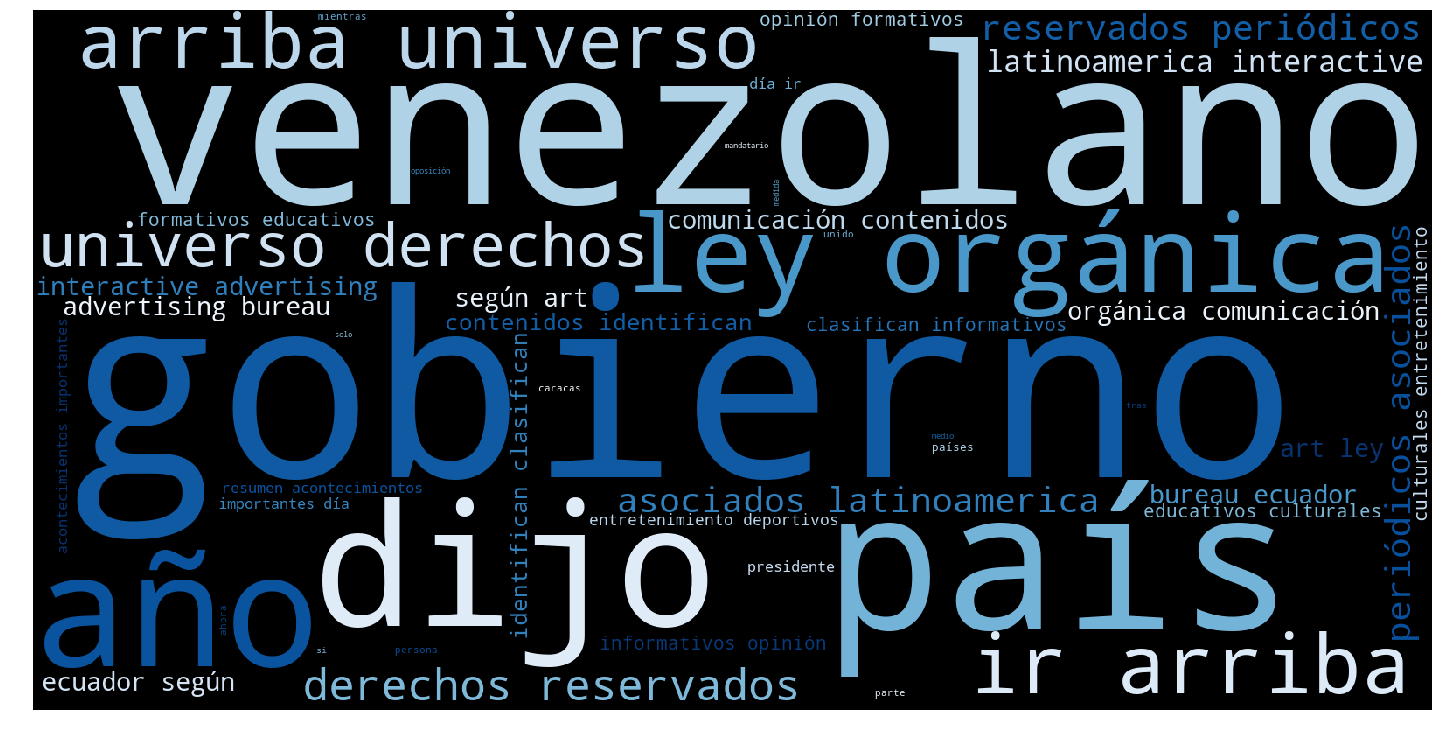

In [45]:
all_words = combined2['texto_lemmatized'].tolist()
cleaned_words = [item for sublist in all_words for item in sublist]

# Convierte  clean_words a una serie y cuenta las ocurrencias más frecuentes
cleaned_words_series = pd.Series(cleaned_words)
words_counts = cleaned_words_series.value_counts()
hashes = cleaned_words_series.values
hashes = hashes.tolist()

# Convierte la lista a un string con todas las palabras
hashes_words = " ".join(hashes)

# Genera la nube de palabras con las palabras más utilizadas
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [48]:
combined2.Topic.value_counts()

Economia     192
Hambre        68
Represion     44
Name: Topic, dtype: int64

In [50]:
combined2["category"] = combined2["Topic"].apply(lambda x: x.lower())

In [51]:
combined2.to_json("validation_filtered.json")

In [25]:
df2

Title      304
Date       304
Parrafo    304
Link       304
Topic      304
dtype: int64